<a href="https://colab.research.google.com/github/DiyaMalhotra/ParameterOptimization_SVM/blob/main/parameter_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


In [3]:

dataset.shape

(55046, 9)

In [4]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           1
heart_disease          1
smoking_history        1
bmi                    1
HbA1c_level            1
blood_glucose_level    1
diabetes               1
dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

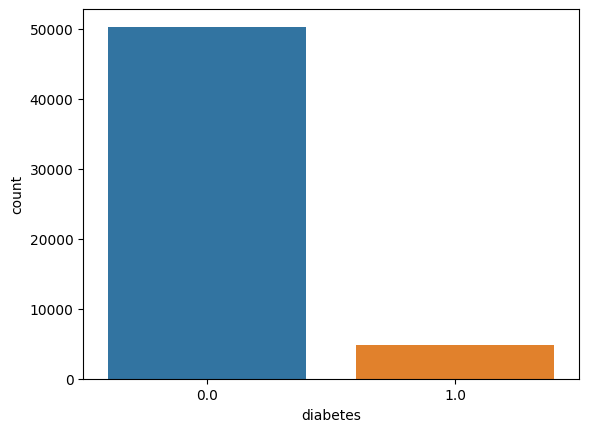

In [6]:
sns.countplot(x = 'diabetes', data=dataset)
     


In [11]:
if dataset['gender'].all=='male':
  dataset['gender']=1
else:
  dataset['gender']=0

In [16]:
dataset = dataset.drop(['smoking_history'],axis=1)

In [38]:
dataset=dataset.dropna()

In [39]:

X = dataset.iloc[:,0:-1]
y = dataset['diabetes']

In [40]:
dataset

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0.0,1.0,25.19,6.6,140.0,0.0
1,0,54.0,0.0,0.0,27.32,6.6,80.0,0.0
2,0,28.0,0.0,0.0,27.32,5.7,158.0,0.0
3,0,36.0,0.0,0.0,23.45,5.0,155.0,0.0
4,0,76.0,1.0,1.0,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...
55040,0,59.0,0.0,0.0,32.26,6.0,90.0,0.0
55041,0,70.0,0.0,0.0,26.88,5.8,140.0,1.0
55042,0,13.0,0.0,0.0,20.54,4.0,140.0,0.0
55043,0,52.0,0.0,0.0,29.05,6.1,140.0,0.0


In [41]:

ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.        ,  1.69518546, -0.28458425, ..., -0.32204257,
         0.99991685,  0.05053928],
       [ 0.        ,  0.53928154, -0.28458425, ..., -0.00171519,
         0.99991685, -1.41343126],
       [ 0.        , -0.61662238, -0.28458425, ..., -0.00171519,
         0.16028729,  0.48973044],
       ...,
       [ 0.        , -1.28349002, -0.28458425, ..., -1.02134884,
        -1.42567965,  0.05053928],
       [ 0.        ,  0.45036586, -0.28458425, ...,  0.25845682,
         0.53345598,  0.05053928],
       [ 0.        ,  0.22807664, -0.28458425, ..., -0.00171519,
        -0.95921878,  0.53852946]])

In [42]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [43]:

samples

[(       gender    age  hypertension  heart_disease    bmi  HbA1c_level  \
  37503       0   7.00           0.0            0.0  17.70          6.6   
  5930        0  80.00           0.0            0.0  27.32          6.0   
  30189       0  37.00           0.0            0.0  21.87          5.7   
  54655       0  57.00           0.0            0.0  27.32          6.6   
  42151       0  42.00           0.0            0.0  25.13          6.1   
  ...       ...    ...           ...            ...    ...          ...   
  45891       0  66.00           0.0            0.0  26.77          6.5   
  52416       0  80.00           0.0            0.0  23.63          4.5   
  42613       0  66.00           0.0            0.0  41.23          9.0   
  43567       0  37.00           0.0            0.0  30.18          5.8   
  2732        0   1.24           0.0            0.0  17.89          6.0   
  
         blood_glucose_level  
  37503                 85.0  
  5930                 145.0  
  30

In [44]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [45]:

def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)
     

In [46]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  5.84 Best Epsilon =  1.61
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  2.89 Best Epsilon =  5.39
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  2.64 Best Epsilon =  7.67
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  2.29 Best Epsilon =  9.21
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  6.69 Best Epsilon =  0.64
Best Accuracy =  0.91 Best Kernel =  rbf Best Nu =  9.67 Best Epsilon =  0.13
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  8.16 Best Epsilon =  8.31
Best Accuracy =  0.93 Best Kernel =  linear Best Nu =  7.91 Best Epsilon =  3.7
Best Accuracy =  0.91 Best Kernel =  rbf Best Nu =  0.03 Best Epsilon =  8.58
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  5.04 Best Epsilon =  1.81


In [47]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.91,sigmoid,5.84,1.61
1,2,0.91,sigmoid,2.89,5.39
2,3,0.92,poly,2.64,7.67
3,4,0.91,sigmoid,2.29,9.21
4,5,0.91,sigmoid,6.69,0.64
5,6,0.91,rbf,9.67,0.13
6,7,0.92,poly,8.16,8.31
7,8,0.93,linear,7.91,3.70
8,9,0.91,rbf,0.03,8.58
9,10,0.91,sigmoid,5.04,1.81


In [48]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [49]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     

In [50]:

train_sizes

array([  346,  1047,  1748,  2448,  3149,  3849,  4550,  5251,  5951,
        6652,  7352,  8053,  8754,  9454, 10155, 10856, 11556, 12257,
       12957, 13658, 14359, 15059, 15760, 16460, 17161, 17862, 18562,
       19263, 19964, 20664, 21365, 22065, 22766, 23467, 24167, 24868,
       25568, 26269, 26970, 27670, 28371, 29072, 29772, 30473, 31173,
       31874, 32575, 33275, 33976, 34677])

In [51]:

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

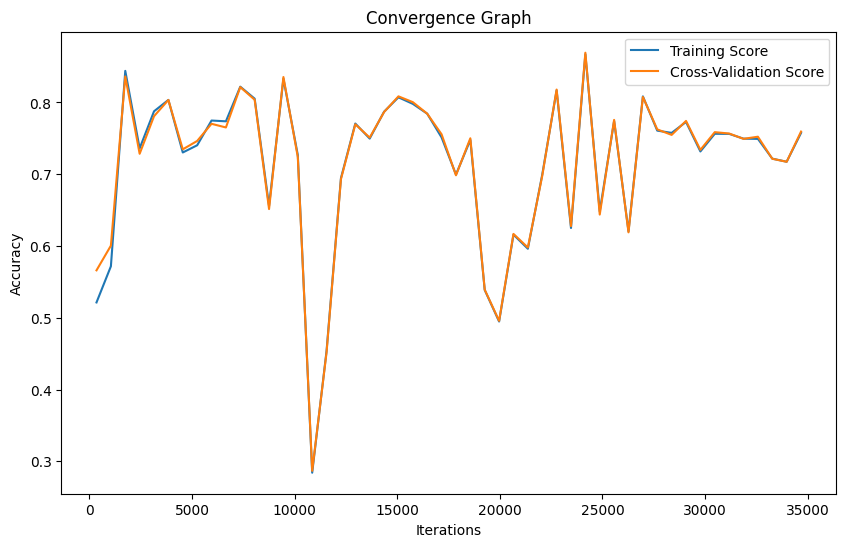

In [52]:

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()